In [46]:
from sklearn.preprocessing import LabelEncoder
from scipy.signal import resample
import numpy as np
from sklearn.model_selection import train_test_split
import pickle



from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

ecg_trn = pickle.load(open('ECG5000_train.pickle', "rb"), encoding='latin1')
ecg_vld = pickle.load(open('ECG5000_validation.pickle', "rb"), encoding='latin1')

ECGdataset = {
    'train': ecg_trn,
    'validation': ecg_vld
}

#feature split
ecg_trn_features = ecg_trn[:, 1:140]
ecg_vld_features = ecg_vld[:, 1:140]

#label split and flatten
y_train = ecg_trn[:, 0]
y_train = y_train.reshape(-1)

y_test = ecg_vld[:, 0]
y_test = y_test.reshape(-1)

X_train_scaled = sclr.fit_transform(ecg_trn_features)
X_test_scaled = sclr.fit_transform(ecg_vld_features)

print(" processed and split")

 processed and split


In [48]:
# SVM with a linear kernel
svm_linear = svm.SVC(kernel='linear', probability=True, random_state=42)

# SVM with an RBF kernel
svm_rbf = svm.SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)

# SVM with a polynomial kernel
svm_poly = svm.SVC(kernel='poly', degree=3, probability=True, random_state=42)

# 4. Create an ensemble of classifiers using soft voting
ensemble_svm = VotingClassifier(estimators=[
    ('svm_linear', svm_linear),
    ('svm_rbf', svm_rbf),
    ('svm_poly', svm_poly)
], voting='soft')  # 'soft' voting uses predicted probabilities

# 5. Train the ensemble model on the training set
ensemble_svm.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = ensemble_svm.predict(X_test)



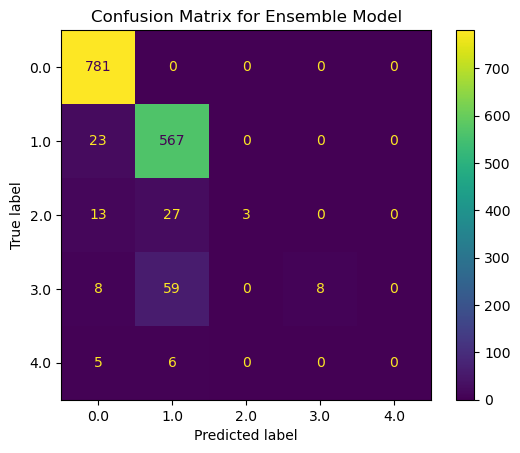


Classification Report for Ensemble Model:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       781
         1.0       0.86      0.96      0.91       590
         2.0       1.00      0.07      0.13        43
         3.0       1.00      0.11      0.19        75
         4.0       0.00      0.00      0.00        11

    accuracy                           0.91      1500
   macro avg       0.76      0.43      0.44      1500
weighted avg       0.91      0.91      0.88      1500

Accuracy: 0.91
Precision: 0.76


In [50]:
from sklearn.metrics import accuracy_score, precision_score

def evaluate_model(y_test, y_pred):
    accuracy= accuracy_score(y_test, y_pred)
    #I changed the prescision method to preven an error
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predict using the ensemble model
y_pred = ensemble_svm.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=ensemble_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ensemble_svm.classes_)
disp.plot()
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# Classification Report
print("\nClassification Report for Ensemble Model:")
print(classification_report(y_test, y_pred, zero_division=0))

evaluate_model(y_test, y_pred)